<a href="https://colab.research.google.com/github/avdesmu/Technical_analysis_and_Stockprice_prediction_netflix/blob/main/Technical_analysis_and_Stockprice_prediction_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Technical Analysis, Stock Trading Strategy and Stock Price Prediction of Netflix Stocks using LSTM** 





![im-215085](https://drive.google.com/uc?export=view&id=1x9rTYFd91Jbgn2Hl0YXPQ7CPBMmLUObt)






## **Importing Libraries**




In [63]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



### Extraction of Stock Quote Data from Yahoo Data Source.


*Note: Added the 'Date' column which is the index for the further candlestick visualization.*

In [58]:
# Stock quote i.e. dataframe
df = web.DataReader('NFLX',data_source='yahoo',start='2020-03-01',end='2020-12-30')
Date =  pd.to_datetime(df.index)
df['Date'] = Date
df.shape

(212, 7)


**CandleStick of Netflix stocks during the Covid lockdown[link text]**

*Note: We can zoom in candle stick for the analysis of individual day or month*


In [59]:
fig = go.Figure(data=[go.Candlestick(x= df['Date'], open=df['Open'], high=df['High'],  low=df['Low'],close=df['Close'])])
fig.update_layout(title = 'Netflix Price',
                  yaxis_title ='Netflix Stock Price', xaxis_title = 'Date')
fig.show() 

## **Technical Analysis of Stocks during Pandemic**

In [5]:
df1 = web.DataReader('NFLX',data_source='yahoo',start='2020-03-01',end='2020-12-31')
Date =  pd.to_datetime(df1.index)
df1['Date'] = Date
df1.shape

(213, 7)

Closing History of Netflix March 2020 to Dec 2020 during Covid-19 lockdown in USA


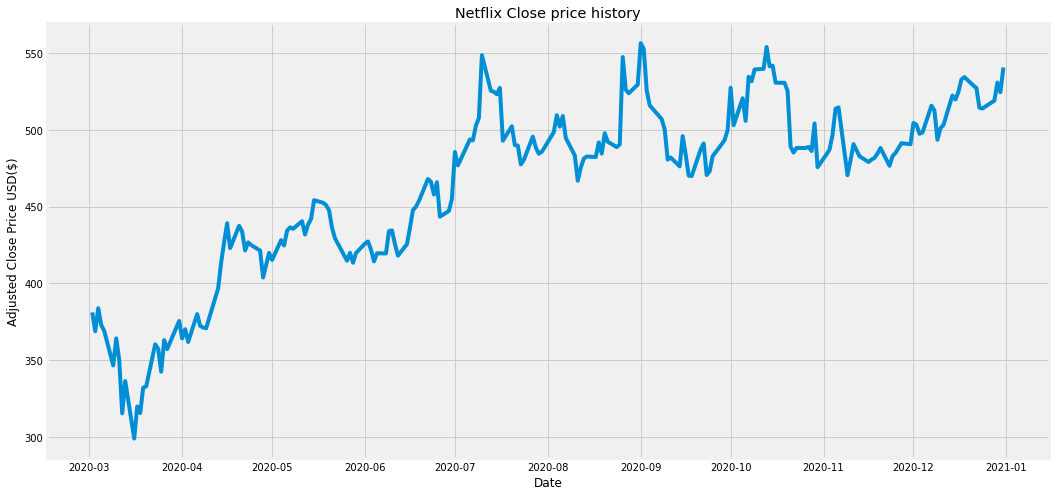

In [6]:
plt.figure(figsize = (16,8))
plt.title('Netflix Close price history')
plt.plot(df1['Adj Close'])
plt.xlabel('Date',color= 'black')
plt.ylabel('Adjusted Close Price USD($)')
plt.show()

## **RSI Calculation (Relative Strength Index)**

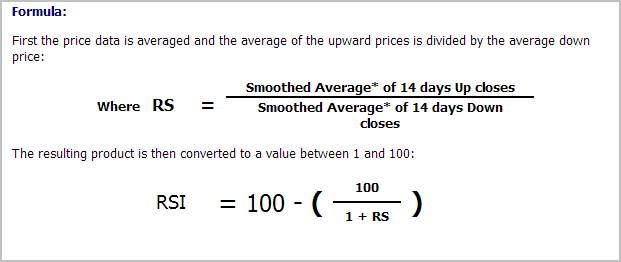

In [7]:
# Get the difference in price from previous day
Delta = df1['Adj Close'].diff(1)
Delta

Date
2020-03-02          NaN
2020-03-03   -12.279999
2020-03-04    15.020020
2020-03-05   -11.010010
2020-03-06    -3.809998
                ...    
2020-12-24    -0.510010
2020-12-28     5.150024
2020-12-29    11.750000
2020-12-30    -6.279968
2020-12-31    16.139954
Name: Adj Close, Length: 213, dtype: float64

In [8]:
#Getting rid of NAN value
Delta = Delta.dropna()
Delta

Date
2020-03-03   -12.279999
2020-03-04    15.020020
2020-03-05   -11.010010
2020-03-06    -3.809998
2020-03-09   -22.480011
                ...    
2020-12-24    -0.510010
2020-12-28     5.150024
2020-12-29    11.750000
2020-12-30    -6.279968
2020-12-31    16.139954
Name: Adj Close, Length: 212, dtype: float64

In [9]:
#Get the Positive Gains and negative Gains
up = Delta.copy()
down = Delta.copy()

up[up<0]=0 #Up contains only poitive values 
down[down>0]=0 # Down only contains negative values

In [10]:
#Get the time period 
#RSI is most typically used on 14 days time period
period = 14 
#Calulate the average gain and the average loss
Avg_gain = up.rolling(window=period).mean()
Avg_loss = abs(down.rolling(window= period).mean())

In [80]:
#Calculate the RSI

#Calculate the relative strength (RS)
RS = Avg_gain/Avg_loss
#Calcualte the RSI
RSI = 100.0 - (100.0 /(1.0 + RS))

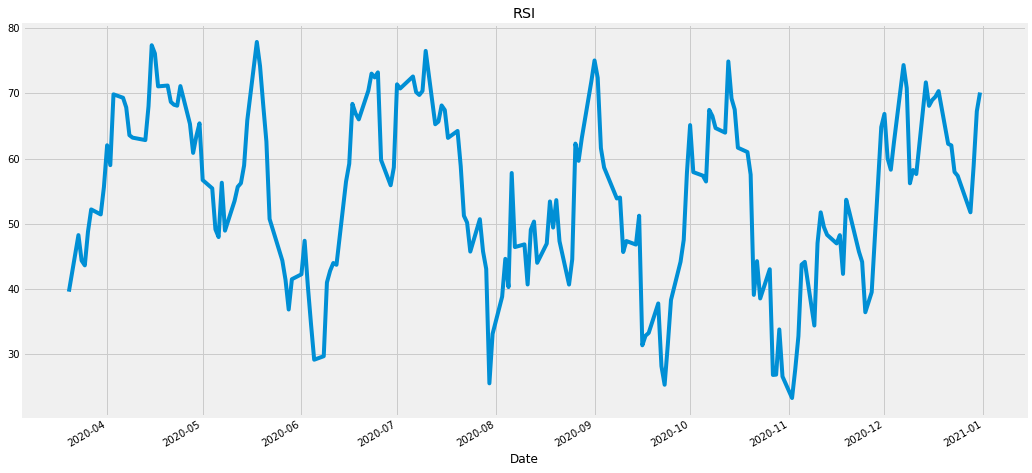

In [12]:
plt.figure(figsize = (16,8))
RSI.plot()
plt.title('RSI')
plt.show()

In [13]:
#Put it all together
new_data = pd.DataFrame()
new_data['Adj Close'] = df1['Adj Close']
new_data['RSI'] = RSI


Note: An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.

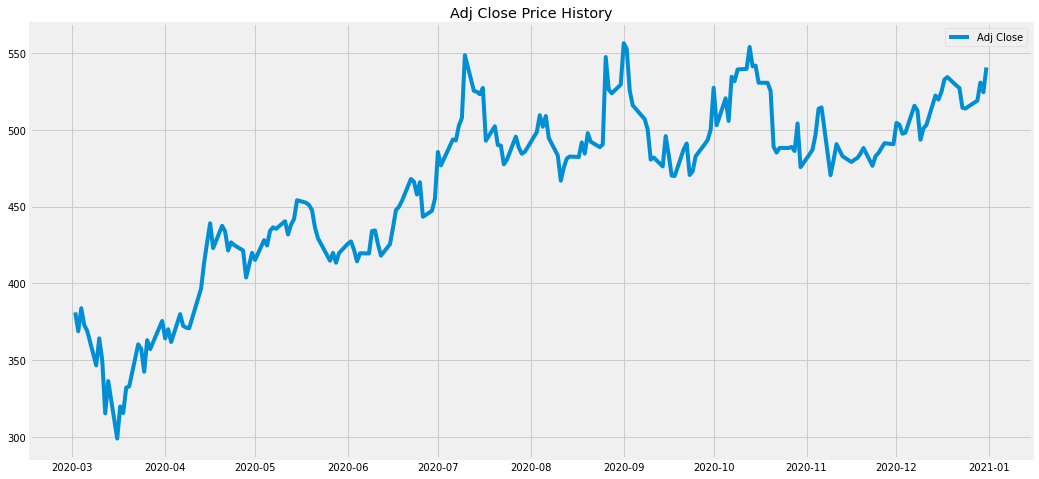

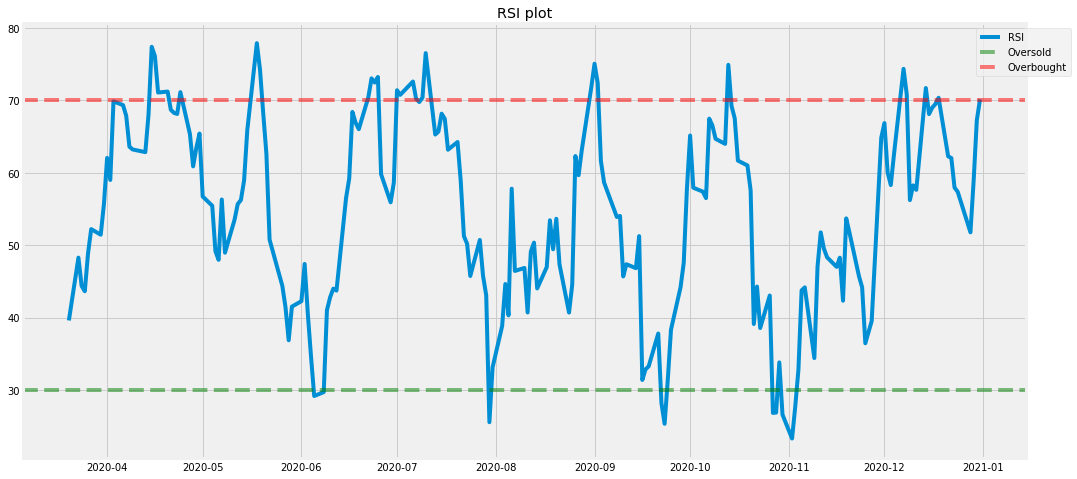

In [14]:
# Visually show the adjusted close price and RSI
#plot the adjusted close price
plt.figure(figsize = (16,8))
plt.plot(new_data.index, new_data['Adj Close'])
plt.title('Adj Close Price History')
plt.legend(new_data.columns.values)
plt.show()
# plot te corresponding RSI values and the significant levels
plt.figure(figsize = (16,8))
plt.title('RSI plot')
plt.plot(new_data.index, new_data['RSI'])
plt.axhline(30, linestyle = '--',alpha = 0.5, color ='green',label = 'Oversold')
plt.axhline(70, linestyle = '--',alpha = 0.5, color ='red',label= 'Overbought')
plt.legend(('RSI','Oversold','Overbought'),bbox_to_anchor=(1.05, 1))
plt.show()

 

## **On Balance- Volume**

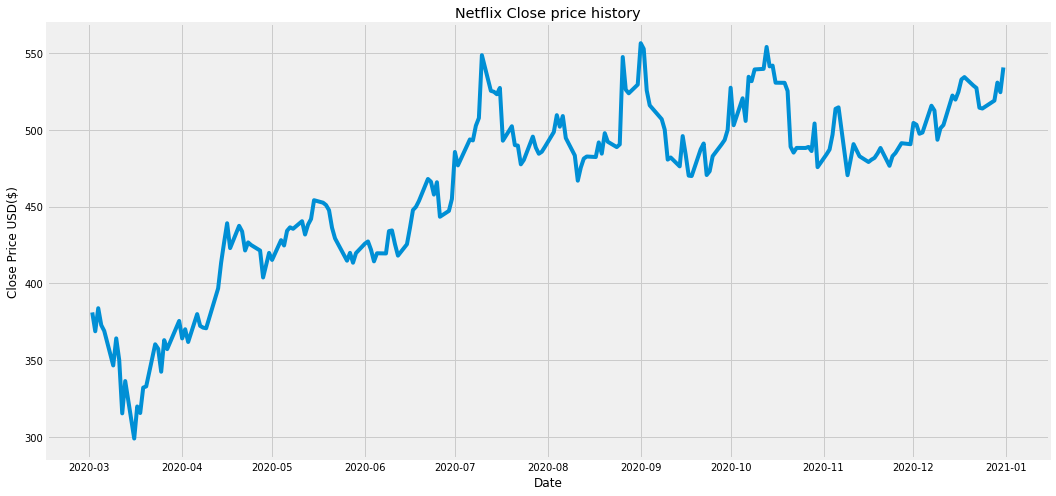

In [16]:
plt.figure(figsize = (16,8))
plt.title('Netflix Close price history')
plt.plot(df1['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.show()

In [17]:
# Calculation of on balance volume
OBV = []
OBV.append(0)
#loop through the dataset 
for i in range(1, len(df1.Close)):
  if df1.Close[i] > df1.Close[i-1]:
    OBV.append(OBV[-1]+df1.Volume[i])
  elif df1.Close[i] < df1.Close[i-1]:
    OBV.append(OBV[-1] - df1.Volume[i])
  else:
    OBV.append(OBV[-1])




In [18]:
#Store the OBV and OBV Exponenetial Moving Average (EMA) into new column
df1['OBV'] = OBV
df1['OBV_EMA'] = df1['OBV'].ewm(span=20).mean() #ewm is  Provide exponential weighted (EW) functions.

df1

,High,Low,Open,Close,Volume,Adj Close,Date,OBV,OBV_EMA
Date,,,,,,,,,
2020-03-02,381.359985,364.500000,373.109985,381.049988,6997900,381.049988,2020-03-02,0,0.000000e+00
2020-03-03,393.519989,367.399994,381.029999,368.769989,8364600,368.769989,2020-03-03,-8364600,-4.391415e+06
2020-03-04,384.010010,370.510010,377.769989,383.790009,5487300,383.790009,2020-03-04,-2877300,-3.835441e+06
2020-03-05,391.399994,368.640015,381.000000,372.779999,8747000,372.779999,2020-03-05,-11624300,-6.083964e+06
2020-03-06,371.309998,356.850006,367.700012,368.970001,8147200,368.970001,2020-03-06,-19771500,-9.394863e+06
...,...,...,...,...,...,...,...,...,...
2020-12-24,519.349976,512.210022,515.119995,513.969971,1144000,513.969971,2020-12-24,2580300,9.307879e+04
2020-12-28,523.659973,507.130005,516.429993,519.119995,2891900,519.119995,2020-12-28,5472200,6.053760e+05
2020-12-29,536.549988,515.479980,519.900024,530.869995,4022400,530.869995,2020-12-29,9494600,1.451969e+06


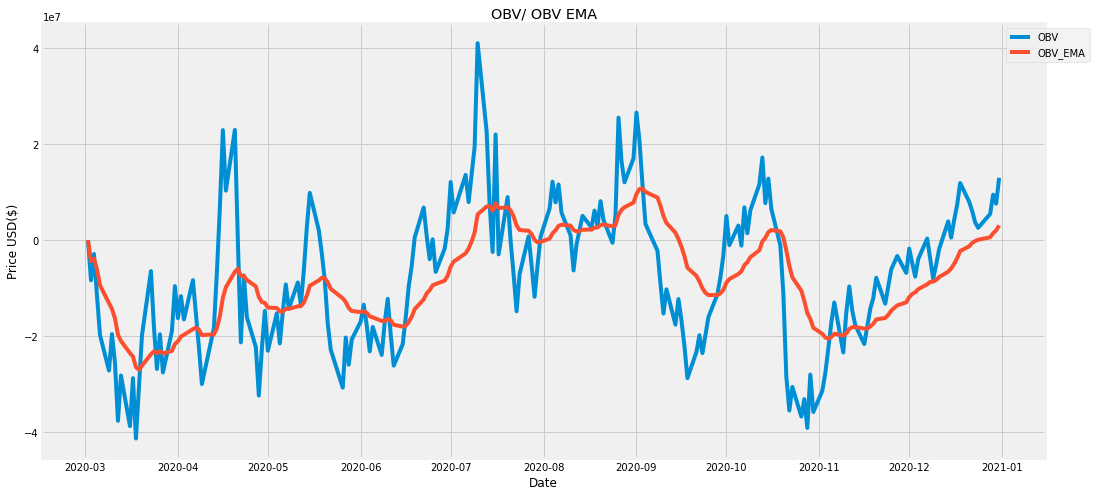

In [19]:
plt.figure(figsize = (16,8))
plt.title('OBV/ OBV EMA')
plt.plot(df1['OBV'], label = 'OBV')
plt.plot(df1['OBV_EMA'],label = 'OBV_EMA')
plt.xlabel('Date')
plt.ylabel('Price USD($)')
plt.legend(('OBV','OBV_EMA'),bbox_to_anchor=(1.05, 1))

plt.show()

### Function to buy and sell the stock
If OBV is above OBV_EMA then Buy

If OBV is below OBV EMA then sell

 note: col1 => 'OBV' and col2 => 'OBV_EMA

In [20]:
def sell_buy(signal,col1,col2):
  buy =[]
  sell=[]
  flag = -1

  for i in range(0, len(signal)):
    if signal[col1][i] > signal[col2][i] and flag != 1:      #buy
      buy.append(signal['Close'][i])
      sell.append(np.nan)
      flag = 1
    elif signal[col1][i] < signal[col2][i] and flag != 0:     #sell
      sell.append(signal['Close'][i])
      buy.append(np.nan)
      flag=0
    else:
      buy.append(np.nan)
      sell.append(np.nan)

  return(buy,sell)

In [21]:
#Create buy and sell
x= sell_buy(df1, 'OBV', 'OBV_EMA')
df1['Buy_Signal_Price'] = x[0]
df1['Sell_Signal_Price'] = x[1]
df1

,High,Low,Open,Close,Volume,Adj Close,Date,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,
2020-03-02,381.359985,364.500000,373.109985,381.049988,6997900,381.049988,2020-03-02,0,0.000000e+00,NaN,NaN
2020-03-03,393.519989,367.399994,381.029999,368.769989,8364600,368.769989,2020-03-03,-8364600,-4.391415e+06,NaN,368.769989
2020-03-04,384.010010,370.510010,377.769989,383.790009,5487300,383.790009,2020-03-04,-2877300,-3.835441e+06,383.790009,NaN
2020-03-05,391.399994,368.640015,381.000000,372.779999,8747000,372.779999,2020-03-05,-11624300,-6.083964e+06,NaN,372.779999
2020-03-06,371.309998,356.850006,367.700012,368.970001,8147200,368.970001,2020-03-06,-19771500,-9.394863e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,519.349976,512.210022,515.119995,513.969971,1144000,513.969971,2020-12-24,2580300,9.307879e+04,NaN,NaN
2020-12-28,523.659973,507.130005,516.429993,519.119995,2891900,519.119995,2020-12-28,5472200,6.053760e+05,NaN,NaN
2020-12-29,536.549988,515.479980,519.900024,530.869995,4022400,530.869995,2020-12-29,9494600,1.451969e+06,NaN,NaN


Plot shows when to buy and sell the stock.

It is the strategy which gives the signal to buy and sell the stock.

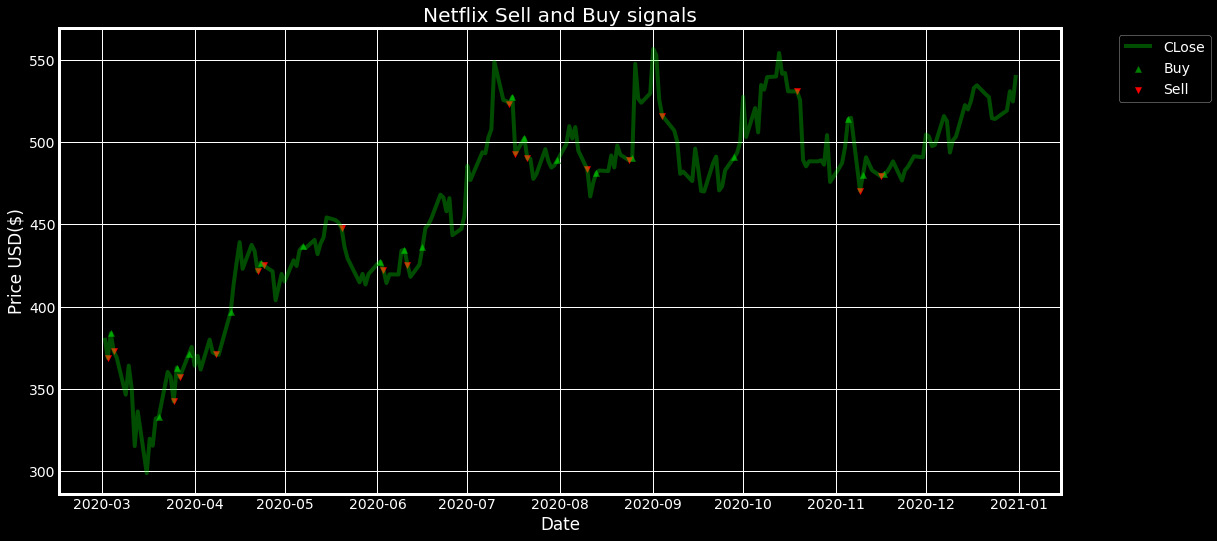

In [77]:
plt.figure(figsize = (16,8))
plt.title('Netflix Sell and Buy signals')
plt.plot(df1['Close'], label = 'Close',alpha = 0.30,color='lime')
plt.scatter(df1.index,df1['Buy_Signal_Price'],label= 'Buy Signal' , marker ='^',alpha= 1, color = 'green')
plt.scatter(df1.index,df1['Sell_Signal_Price'],label= 'Sell Signal',marker ='v', alpha =1, color = 'red')

plt.xlabel('Date')
plt.ylabel('Price USD($)')
plt.legend(('CLose','Buy','Sell'),bbox_to_anchor=(1.05, 1))
plt.show()

## **Stock Price Prediction of Netflix using LSTM**

In [23]:
#New Data Frame with the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy 
dataset = data.values
#get the number of rows to train the data model
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1812

In [24]:
# Scale the data (It is advantages to scale the input data before it is represented to neural netwrk )
scaler =MinMaxScaler(feature_range=(0,1))
scale_data = scaler.fit_transform(dataset)
scale_data

array([[0.00479952],
       [0.0069364 ],
       [0.00663708],
       ...,
       [0.93180465],
       [0.95321249],
       [0.94177074]])

In [25]:
#Create the training dataset
#Create the Scaled training dataset
train_data = scale_data[0:training_data_len, :]
#Splitt the data into x_train and y_train
x_train = []
y_train = []


for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  

In [26]:
# Convert x_train and y_train into numpy array (we can use the to train the LST model)
x_train , y_train =np.array(x_train), np.array(y_train)

In [27]:
x_train.shape

(1752, 60)

In [28]:
# Reshape the X_train data set because LSTM network expects input to be 3D in the form of number of samples, nuber of time steps and number of features
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1752, 60, 1)

In [47]:
#Build model
model = Sequential()
model.add(LSTM(80, return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(80, return_sequences= False))
model.add(Dense(80))
model.add(Dense(1))


In [48]:
#Compile the model
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [49]:
#Train the data
model.fit(x_train,y_train, batch_size= 1, epochs =1,verbose=0)


In [50]:
# Create the testing data set
#Create the array containing scaled values from index
test_data = scale_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test= dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [51]:
#Convert the data into numpy array
x_test = np.array(x_test)


In [52]:
#Reshape the data 
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [53]:
#Get the models predicted values
predictions = model.predict(x_test,verbose=0)
predictions = scaler.inverse_transform(predictions)

In [54]:
#evalute the model by getting the RMSE value
rmse = np.sqrt(np.mean(predictions- y_test)**2)
rmse

2.1602624538725457

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



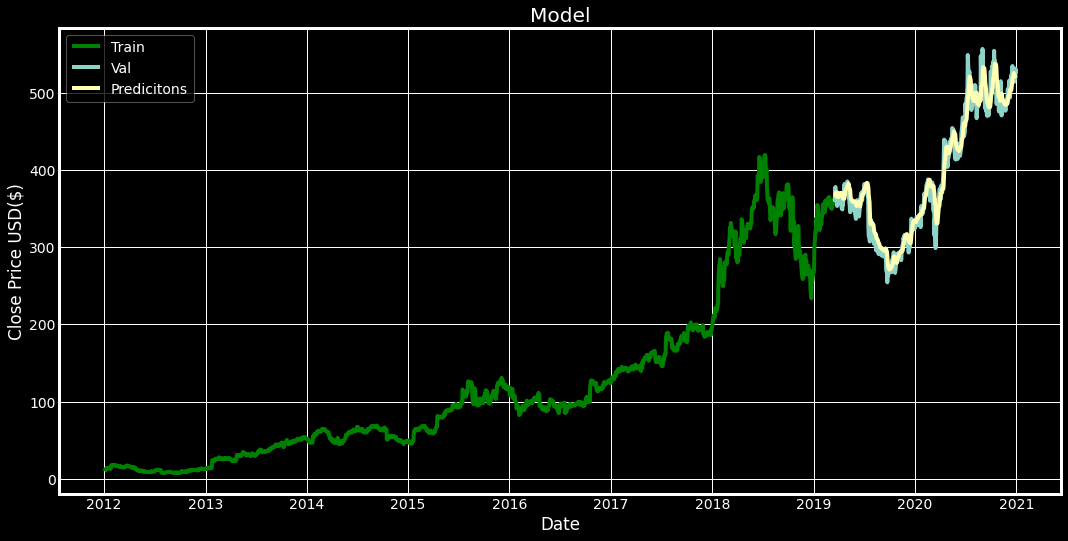

In [85]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicitons']= predictions
#plt
plt.figure(figsize= (16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.plot(train['Close'],color= 'Green')
plt.plot(valid[['Close','Predicitons']])
plt.legend(['Train','Val','Predicitons'])
plt.show()

The Actual and predicted values

In [86]:
valid

,Close,Predicitons
Date,,
2019-03-19,358.779999,364.148346
2019-03-20,375.220001,364.573059
2019-03-21,377.869995,367.077332
2019-03-22,361.010010,370.377380
2019-03-25,366.230011,371.031372
...,...,...
2020-12-23,514.479980,525.360718
2020-12-24,513.969971,524.234314
2020-12-28,519.119995,522.267822


The Predicted values are close to actual price with the RMSE value of 2.2